# II. Исследовательский анализ данных (EDA)

**Цель:** провести исследовательский анализ, выявить закономерности и аномалии, визуализировать распределения, сегментировать пользователей и сформулировать аналитические гипотезы для дальнейшей проверки.

---
## 1. Импорт библиотек и загрузка очищенных данных
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set_theme(style="darkgrid", palette="deep")

In [2]:
df = pd.read_csv("../data/cleaned/kicksharing_clean.csv")

# Быстрый просмотр
print(f"Размер очищенного датасета: {df.shape}\n")
print(df.info())
print(f"\nОписание:\n{df.describe()}")
df.head()

Размер очищенного датасета: (355637, 25)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355637 entries, 0 to 355636
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   order_rk                 355637 non-null  int64  
 1   party_rk                 355637 non-null  int64  
 2   gender_cd                355637 non-null  object 
 3   age                      355637 non-null  int64  
 4   education_level_cd       355637 non-null  object 
 5   marital_status_cd        355637 non-null  object 
 6   lvn_state_nm             355637 non-null  object 
 7   minute_cost              355637 non-null  float64
 8   activation_cost          355637 non-null  float64
 9   hold_amount              355637 non-null  float64
 10  transport_model          355637 non-null  object 
 11  distance_km              355637 non-null  float64
 12  created_dttm             355637 non-null  object 
 13  book_start_dttm  

,order_rk,party_rk,gender_cd,age,education_level_cd,marital_status_cd,lvn_state_nm,minute_cost,activation_cost,hold_amount,...,book_time_zone_cd,local_book_start_dttm,nominal_price_rub_amt,loyalty_accrual_rub_amt,trip_duration_min,avg_speed_kmh,cashback_rate,hour,day_of_week,month
0,252614779,517007040,M,26,GRD,UNM,Г МОСКВА,7.99,50.0,300.0,...,3,2024-04-17 16:45:20.641980,97.94,0.0,6.096024,7.929701,0.000000,16,2,4
1,252613066,297828357,M,31,Unknown,UNM,ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - ЮГРА АО,7.99,50.0,300.0,...,3,2024-04-22 15:46:10.062458,121.91,1.0,8.899159,1.603706,0.008203,15,0,4
2,252621809,145875613,M,35,GRD,DIV,Г МОСКВА,7.99,50.0,300.0,...,3,2024-04-22 15:47:00.283797,129.90,1.0,9.472665,1.786802,0.007698,15,0,4
3,252632392,328153536,M,25,Unknown,Unknown,Г САНКТ-ПЕТЕРБУРГ,6.99,30.0,300.0,...,3,2024-04-23 06:53:45.475088,57.96,0.0,3.226266,5.638083,0.000000,6,1,4
4,252633271,517007040,M,26,GRD,UNM,Г МОСКВА,7.49,50.0,300.0,...,3,2024-04-23 09:46:22.008459,87.45,0.0,4.267223,11.568776,0.000000,9,1,4


При загрузке файла сбросились типы данных: `datetime` и `category`. Необходимо их восстановить.

In [3]:
date_columns = ['created_dttm', 'book_start_dttm',
                'book_end_dttm', 'local_book_start_dttm']

for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')

df[date_columns].dtypes

created_dttm             datetime64[ns]
book_start_dttm          datetime64[ns]
book_end_dttm            datetime64[ns]
local_book_start_dttm    datetime64[ns]
dtype: object

In [4]:
category_columns = ['gender_cd', 'education_level_cd', 'marital_status_cd',
                    'lvn_state_nm', 'transport_model']

for col in category_columns:
    df[col] = df[col].astype('category')

df[category_columns].dtypes

gender_cd             category
education_level_cd    category
marital_status_cd     category
lvn_state_nm          category
transport_model       category
dtype: object

In [5]:
df.dtypes

order_rk                            int64
party_rk                            int64
gender_cd                        category
age                                 int64
education_level_cd               category
marital_status_cd                category
lvn_state_nm                     category
minute_cost                       float64
activation_cost                   float64
hold_amount                       float64
transport_model                  category
distance_km                       float64
created_dttm               datetime64[ns]
book_start_dttm            datetime64[ns]
book_end_dttm              datetime64[ns]
book_time_zone_cd                   int64
local_book_start_dttm      datetime64[ns]
nominal_price_rub_amt             float64
loyalty_accrual_rub_amt           float64
trip_duration_min                 float64
avg_speed_kmh                     float64
cashback_rate                     float64
hour                                int64
day_of_week                       

---
## 2. Базовые метрики и статистики
---

In [6]:
# Описательная статистика по числовым столбцам
df.describe().T

,count,mean,min,25%,50%,75%,max,std
order_rk,355637.0,288807893.563164,252611203.0,261320033.0,270153702.0,343265919.0,356252785.0,38071366.450194
party_rk,355637.0,596356545.720338,14717.0,293658280.0,610184067.0,863746760.0,1301075452.0,330856723.829279
age,355637.0,31.552724,12.0,24.0,31.0,37.0,94.0,9.410802
minute_cost,355637.0,7.28937,2.5,6.49,7.49,8.23,19.99,1.290499
activation_cost,355637.0,42.615715,0.0,30.0,50.0,50.0,50.0,12.01474
hold_amount,355637.0,300.0,300.0,300.0,300.0,300.0,300.0,0.0
distance_km,355637.0,2.478148,0.100033,1.063088,1.798886,3.072984,29.955786,2.3256
created_dttm,355637,2024-08-18 09:25:53.922530048,2024-04-17 16:45:16,2024-07-20 18:18:20,2024-08-22 18:45:57,2024-09-16 06:08:18,2024-10-21 17:18:04,NaN
book_start_dttm,355637,2024-08-18 09:26:00.050814464,2024-04-17 16:45:20.641980,2024-07-20 18:18:40.355107072,2024-08-22 18:46:00.130082048,2024-09-16 06:08:22.547000064,2024-10-21 17:18:07.715000,NaN
book_end_dttm,355637,2024-08-18 09:37:39.141963520,2024-04-17 16:51:26.403392,2024-07-20 18:34:36.693197056,2024-08-22 18:57:11.688344064,2024-09-16 06:17:11.687091968,2024-10-21 17:23:06.640943,NaN


In [7]:
# Расчёт уникальных пользователей
unique_users = df['party_rk'].nunique()

print(f"Уникальных пользователей: {unique_users}")

Уникальных пользователей: 58033


Количество уникальных пользователей меньше, чем записей в датасете. Это говорит нам о том, что присутствуют постоянные пользователи сервиса.

In [8]:
metrics = {
    'avg_price': df['nominal_price_rub_amt'].mean(),
    'median_price': df['nominal_price_rub_amt'].median(),
    'avg_trip_duration': df['trip_duration_min'].mean(),
    'median_trip_duration': df['trip_duration_min'].median(),
    'avg_distance_km': df['distance_km'].mean(),
    'median_distance_km': df['distance_km'].median(),
}

for key, value in metrics.items():
    print(f"{key}: {value}")

avg_price: 129.82257993403385
median_price: 105.93
avg_trip_duration: 11.651519141535704
median_trip_duration: 8.161185133333333
avg_distance_km: 2.4781479192907123
median_distance_km: 1.79888609590842


---
## 3. Распределения количественных признаков
---

Рассмотрим распределение возраста пользователей, стоимости минуты за поездку, километража, стоимости поездки и длительности поездки.

Для распределения возраста пользователей важно смотреть на уникальных пользователей, так мы качественно составим информацию о клиентах.

In [9]:
# Создадим датасет, в котором оставим только уникальные идентификаторы клиентов
user_df = df.drop_duplicates(subset='party_rk')

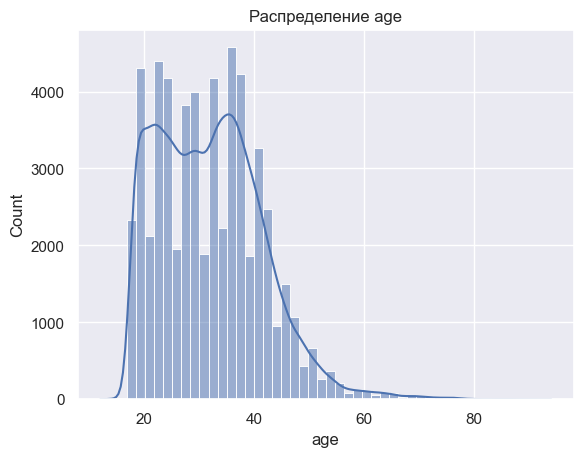

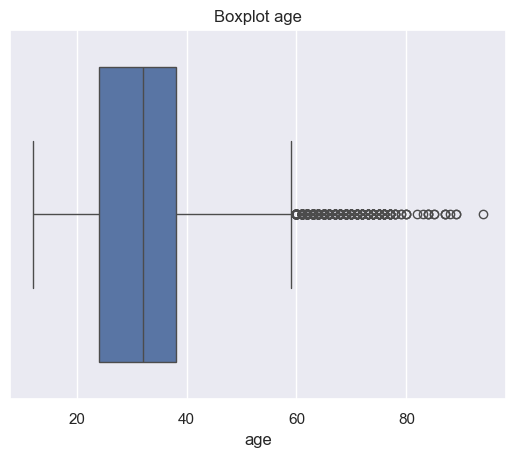

In [10]:
sns.histplot(user_df['age'], bins=50, kde=True)
plt.title(f"Распределение age")
plt.show()
sns.boxplot(x = user_df['age'])
plt.title(f"Boxplot age")
plt.show()

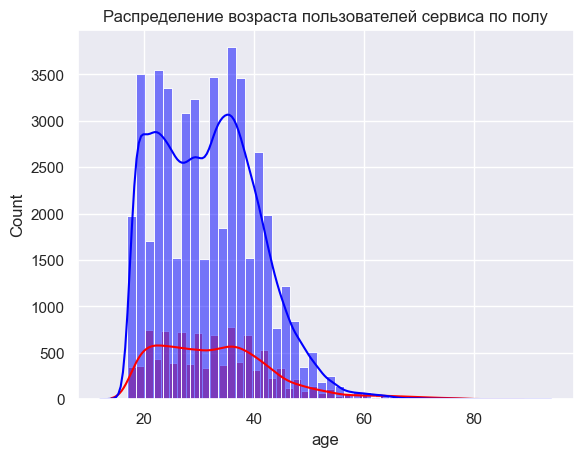

In [11]:
sns.histplot(user_df.query("gender_cd == 'F'")['age'], bins=50, color='red', kde=True)
sns.histplot(user_df.query("gender_cd == 'M'")['age'], bins=50, color='blue', kde=True)
plt.title(f"Распределение возраста пользователей сервиса по полу")
plt.show()

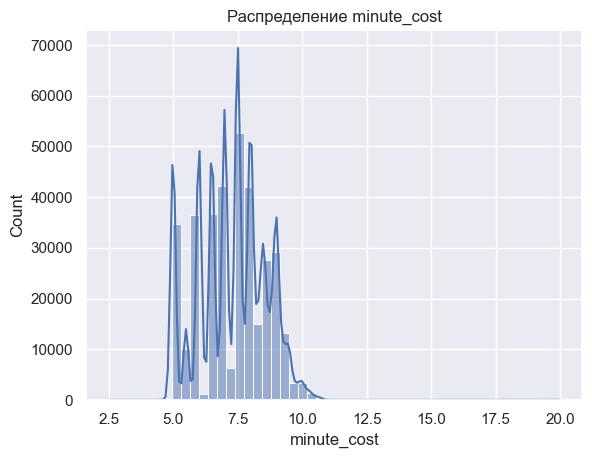

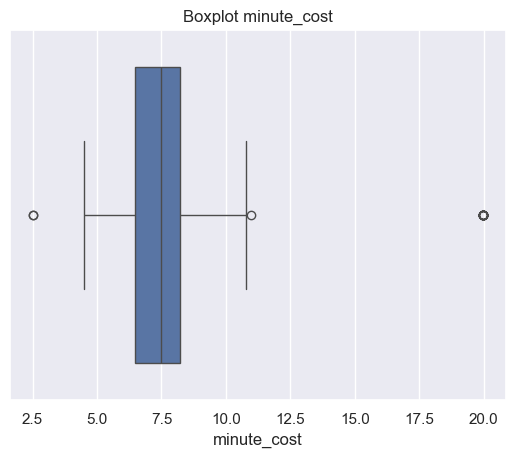

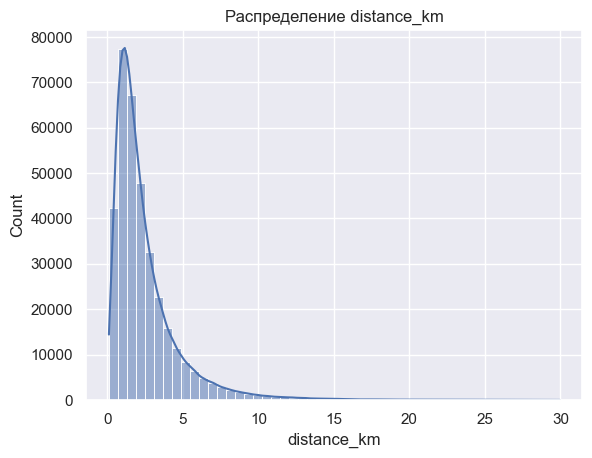

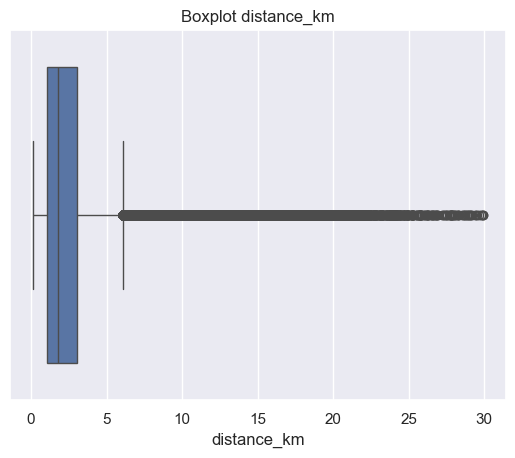

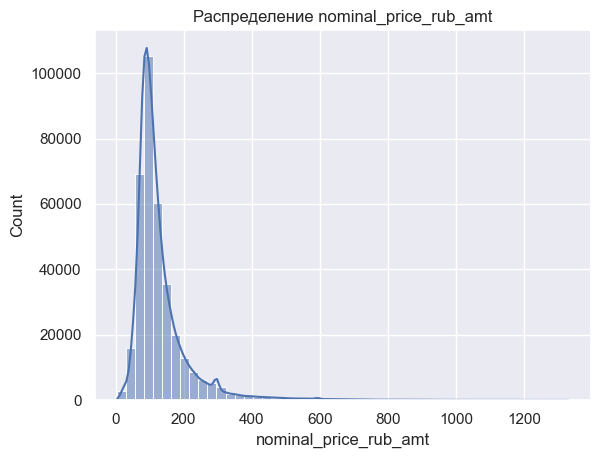

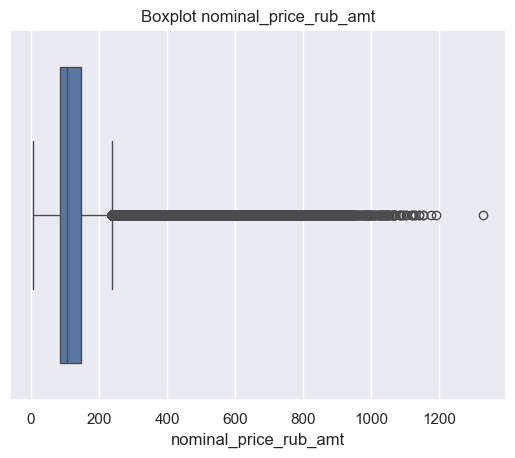

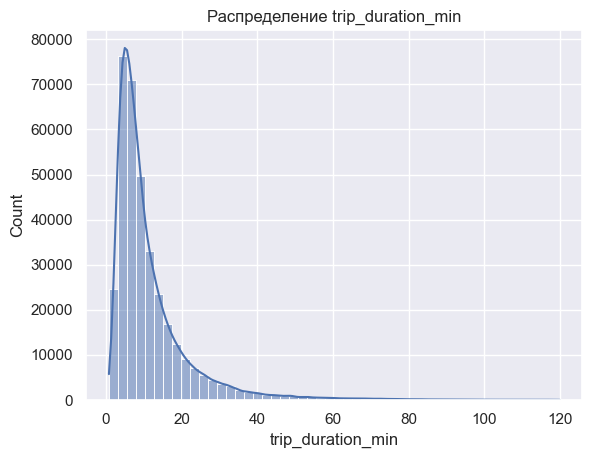

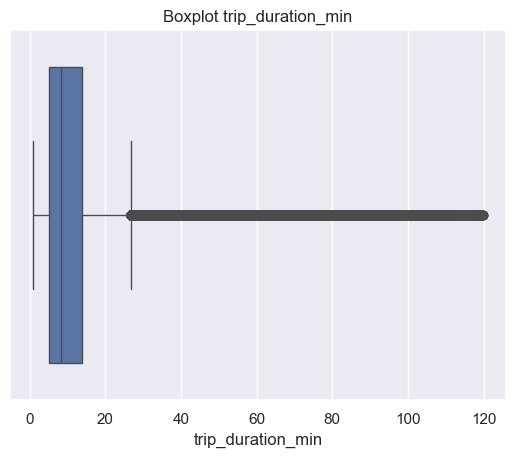

In [12]:
# Распределение количественных признаков поездок
columns = ['minute_cost', 'distance_km', 'nominal_price_rub_amt', 'trip_duration_min']

for col in columns:
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f"Распределение {col}")
    plt.show()
    sns.boxplot(x = df[col])
    plt.title(f"Boxplot {col}")
    plt.show()

**Анализ распределений:**
1. Активные пользователи сервиса — люди от 20 до 40 лет.
2. Средняя стоимость минуты поездки — около 7 рублей.
3. Большая часть поездок длится до 30 минут.

In [13]:
# Метрики количественных признаков
metrics = {
    'avg_age': user_df['age'].mean(),
    'median_age': user_df['age'].median(),
    'avg_minute_cost': df['minute_cost'].mean(),
    'median_minute_cost': df['minute_cost'].median(),
    'avg_price': df['nominal_price_rub_amt'].mean(),
    'median_price': df['nominal_price_rub_amt'].median(),
    'avg_trip_duration': df['trip_duration_min'].mean(),
    'median_trip_duration': df['trip_duration_min'].median(),
    'avg_distance_km': df['distance_km'].mean(),
    'median_distance_km': df['distance_km'].median(),
}

for key, value in metrics.items():
    print(f"{key}: {value}")

avg_age: 31.98726586597281
median_age: 32.0
avg_minute_cost: 7.289370284869122
median_minute_cost: 7.49
avg_price: 129.82257993403385
median_price: 105.93
avg_trip_duration: 11.651519141535704
median_trip_duration: 8.161185133333333
avg_distance_km: 2.4781479192907123
median_distance_km: 1.79888609590842


- Средний возраст пользователей: 32 года.
- Средняя стоимость минуты поездки: 7,3 рубля.
- Средняя стоимость поездки: 130 рублей.
- Средняя длительность поездки: 11,5 минут.
- Средний километраж поездки: 2,5 км.

<Axes: >

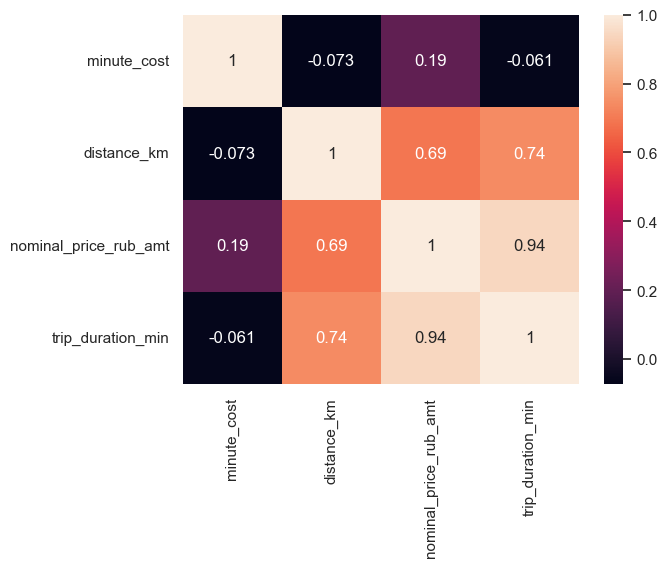

In [14]:
# Матрица корреляции показывает зависимость между переменными
sns.heatmap(df[columns].corr(), annot=True)

- Дистанция (`distance_km`) и длительность (`trip_duration_min`) связаны (0.74), что отражает естественную зависимость: чем дольше поездка, тем больше расстояние.
- Дистанция (`distance_km`) и стоимость поездки (`nominal_price_rub_amt`) также положительно связаны (0.69) — клиенты, проезжающие больше километров, платят больше.
- Длительность поездки (`trip_duration_min`) и стоимость поездки (`nominal_price_rub_amt`) сильно связаны (0.95). Обусловлено естественной зависимостью: чем дольше поездка, тем больше стоимость поездки, которая рассчитывается как произведение стоимости минуты на количество минут.

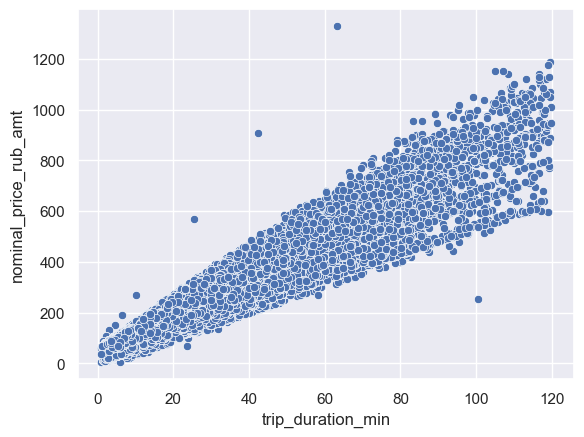

In [15]:
# Зависимость стоимости от длительности поездки
sns.scatterplot(x='trip_duration_min', y='nominal_price_rub_amt', data=df)
plt.show()

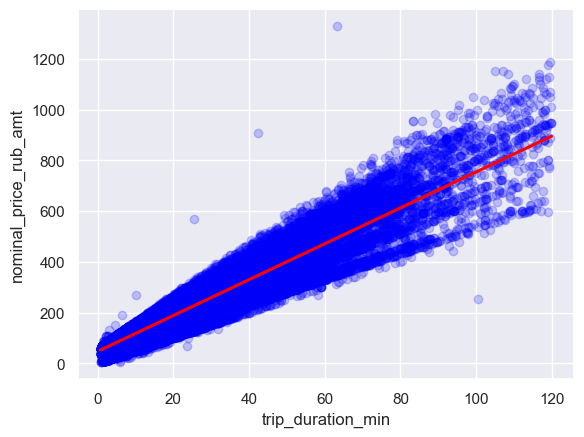

In [16]:
sns.regplot(x='trip_duration_min', y='nominal_price_rub_amt',
            scatter_kws={'color': 'blue', 'alpha': 0.2}, line_kws={'color': 'red'}, data=df)
plt.show()

---
## 4. Распределение временных признаков
---

Исследуем активность пользователей во времени:
- пиковые часы в течение дня;
- в какие дни недели поездки наиболее популярны;
- как распределены поездки по месяцам.

Для этого создадим новые колонки для названия дня недели и названия месяца на основе уже имеющихся признаков.

In [17]:
# Из локальной даты клиента извлечём: название дня недели, название месяца

df['name_day_of_week'] = df['local_book_start_dttm'].dt.day_name()

df['month_name'] = df['local_book_start_dttm'].dt.month_name()

df.head()

,order_rk,party_rk,gender_cd,age,education_level_cd,marital_status_cd,lvn_state_nm,minute_cost,activation_cost,hold_amount,...,nominal_price_rub_amt,loyalty_accrual_rub_amt,trip_duration_min,avg_speed_kmh,cashback_rate,hour,day_of_week,month,name_day_of_week,month_name
0,252614779,517007040,M,26,GRD,UNM,Г МОСКВА,7.99,50.0,300.0,...,97.94,0.0,6.096024,7.929701,0.000000,16,2,4,Wednesday,April
1,252613066,297828357,M,31,Unknown,UNM,ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - ЮГРА АО,7.99,50.0,300.0,...,121.91,1.0,8.899159,1.603706,0.008203,15,0,4,Monday,April
2,252621809,145875613,M,35,GRD,DIV,Г МОСКВА,7.99,50.0,300.0,...,129.90,1.0,9.472665,1.786802,0.007698,15,0,4,Monday,April
3,252632392,328153536,M,25,Unknown,Unknown,Г САНКТ-ПЕТЕРБУРГ,6.99,30.0,300.0,...,57.96,0.0,3.226266,5.638083,0.000000,6,1,4,Tuesday,April
4,252633271,517007040,M,26,GRD,UNM,Г МОСКВА,7.49,50.0,300.0,...,87.45,0.0,4.267223,11.568776,0.000000,9,1,4,Tuesday,April


In [18]:
# Проверим тип новых колонок
df.dtypes.tail()

hour                 int64
day_of_week          int64
month                int64
name_day_of_week    object
month_name          object
dtype: object

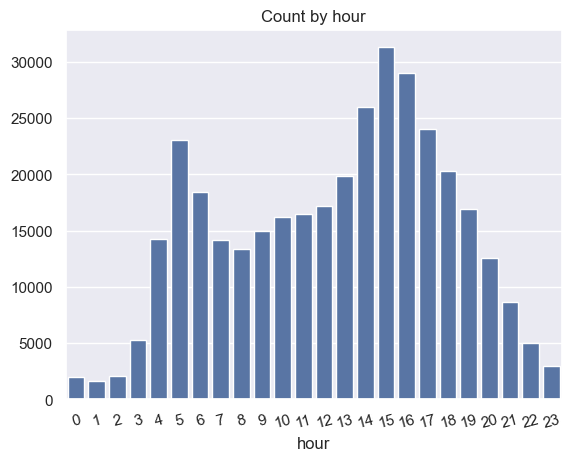

,rides,avg_price,avg_distance
hour,,,
15,31306,138.319383,2.619940
16,29005,137.838568,2.514905
14,26000,136.974841,2.599473
17,24023,137.628009,2.542507
5,23028,107.723386,2.244748
18,20346,137.321866,2.553153
13,19872,139.352561,2.565468
6,18405,110.439534,2.200963
12,17168,133.557245,2.546450


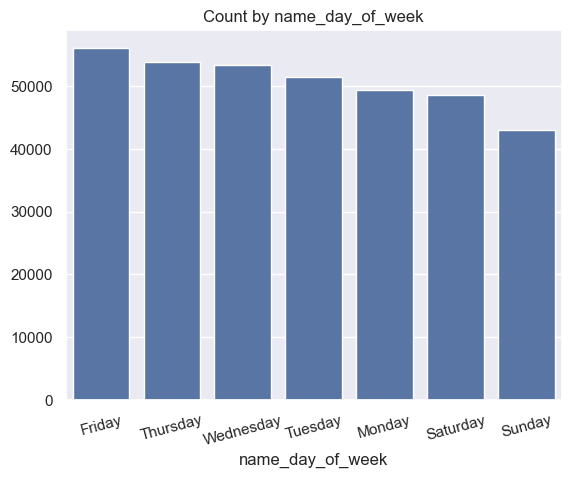

,rides,avg_price,avg_distance
name_day_of_week,,,
Friday,56119,127.758187,2.477091
Thursday,53802,124.773244,2.394501
Wednesday,53282,126.056081,2.409436
Tuesday,51499,125.883300,2.452793
Monday,49415,124.094226,2.413335
Saturday,48537,141.517456,2.615894
Sunday,42983,141.606403,2.618749


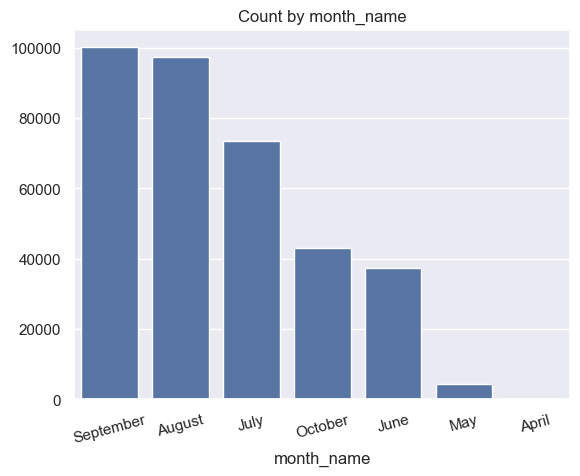

,rides,avg_price,avg_distance
month_name,,,
September,100163,132.702806,2.750664
August,97284,132.405072,2.737748
July,73564,127.482843,2.329660
October,43041,123.920729,1.842549
June,37215,125.157561,2.130735
May,4324,143.925969,2.179287
April,46,108.960435,1.399746


In [19]:
date_columns = ['hour', 'name_day_of_week', 'month_name']

for c in date_columns:
    vc = df[c].value_counts()
    sns.barplot(x=vc.index, y=vc.values)
    plt.title(f'Count by {c}')
    plt.xticks(rotation=15)
    plt.show()

    # метрики по категориям
    agg = df.groupby(c).agg(
        rides=('order_rk', 'count'),
        avg_price=('nominal_price_rub_amt', 'mean'),
        avg_distance=('distance_km', 'mean')
    ).sort_values('rides', ascending=False)

    display(agg)

Исследовали распределение поездок по времени, чтобы понять поведение пользователей.

Важно учесть следующий фактор, который мы заметили ранее при анализе: "Данные охватывают период с 2024-04-07 14:56:47 по 2024-10-21 17:18:04".

**Анализ временных признаков:**
1. Распределение по часам:
    - Наибольшее количество поездок приходится на дневное и вечернее время (с 14:00 до 18:00), что соответствует времени завершения учебного и рабочего дня.
    - Также выделяется утренний всплеск с 05:00 до 06:00, что может быть связано с утренними поездками на работу в крупных городах (проверим это позже).
    - Минимум поездок наблюдается ночью — с 23:00 до 03:00.
2. Распределение по дням недели:
    - Активность постепенно растёт с понедельника по пятницу, достигая пика в пятницу.
    - В выходные наблюдается снижение количества поездок. Однако спрос остаётся стабильным.
    - Таким образом, будни отражают утилитарное использование (на учёбу, на работу, по делам), а выходные — развлекательное (прогулки, встречи).
3. Распределение по месяцам:
    - Обратим внимание, что на официальном сайте Т-Банка есть новость о сервисе "Самокат", которую важно изучить для полноты картины — "04 июня 2024 года Тинькофф объявил о запуске нового сервиса «Самокаты». Первым партнером стала кикшеринговая компания Юрент". Поэтому можно предположить, что малое количество поездок в апреле и мае обусловлено тем, что запуск сервиса был в тестовом формате.
    - Сезонность выражена чётко. Рост активности начинается в июне, пик приходится на август–сентябрь, затем наблюдается спад в октябре, который связан с окончанием сезона.

**Вывод:** эти закономерности важно учитывать при планировании логистики и маркетинговых акций: усиливать промо в периоды спада, оптимизировать количество самокатов в пиковые часы и пятничные дни.

---
## 5. Распределение категориальных признаков
---

Проверим, в каких городах чаще всего пользуются самокатами 5 до 6 утра.

In [20]:
df[['lvn_state_nm', 'hour']].query('hour == 5').value_counts().head()

lvn_state_nm       hour
Г МОСКВА           5       5941
Г САНКТ-ПЕТЕРБУРГ  5       2749
МОСКОВСКАЯ ОБЛ     5       2484
СВЕРДЛОВСКАЯ ОБЛ   5       2031
Unknown            5       1810
Name: count, dtype: int64

Скорее всего, утренний всплеск поездок и правда связан с необходимостью добраться на работу в крупных городах.

In [21]:
print(f"Количество уникальных регионов: {df.lvn_state_nm.nunique()}")

Количество уникальных регионов: 207


Уникальные регионы не поместятся в названии оси при визуализации, поэтому выведем информацию о распределении поездок по регионам в табличном виде.

In [22]:
df['lvn_state_nm'].value_counts()

lvn_state_nm
Г МОСКВА                             82120
МОСКОВСКАЯ ОБЛ                       35983
Г САНКТ-ПЕТЕРБУРГ                    34298
Unknown                              30656
СВЕРДЛОВСКАЯ ОБЛ                     26128
                                     ...  
ТАТАРСТАН                                1
ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ        1
ЧУВАШИЯ ЧУВАШСКАЯ РЕСПУБЛИКА -           1
ЧЕЛЯБИНСКАЯ ОБЛ.                         1
ЧЕЛЯБИНСКАЯ ОБЛАСТЬ                      1
Name: count, Length: 207, dtype: int64

Активнее всего сервис используется в Москве и МО, в Санкт-Петербурге, в Свердловской области и в Краснодарском крае.

In [23]:
print(f"Доля поездок в Москве и Московской области от всех поездок: {len(df.query("(lvn_state_nm == 'Г МОСКВА') | (lvn_state_nm == 'МОСКОВСКАЯ ОБЛ')")) / len(df) * 100}%")

Доля поездок в Москве и Московской области от всех поездок: 33.20886184508361%


Поездки в Москве и Московской области занимают треть всех поездок.

**`lvn_state_nm`** — регион проживания клиента, что является информацией о клиенте. Посмотрим на распределение клиентов по регионам:

In [24]:
user_df['lvn_state_nm'].value_counts()

lvn_state_nm
Г МОСКВА                             10833
Unknown                               5553
МОСКОВСКАЯ ОБЛ                        5483
Г САНКТ-ПЕТЕРБУРГ                     5079
СВЕРДЛОВСКАЯ ОБЛ                      3001
                                     ...  
ТАТАРСТАН                                1
ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ        1
ЧУВАШИЯ ЧУВАШСКАЯ РЕСПУБЛИКА -           1
ЧЕЛЯБИНСКАЯ ОБЛ.                         1
ЧЕЛЯБИНСКАЯ ОБЛАСТЬ                      1
Name: count, Length: 207, dtype: int64

Распределение моделей самокатов по поездкам.

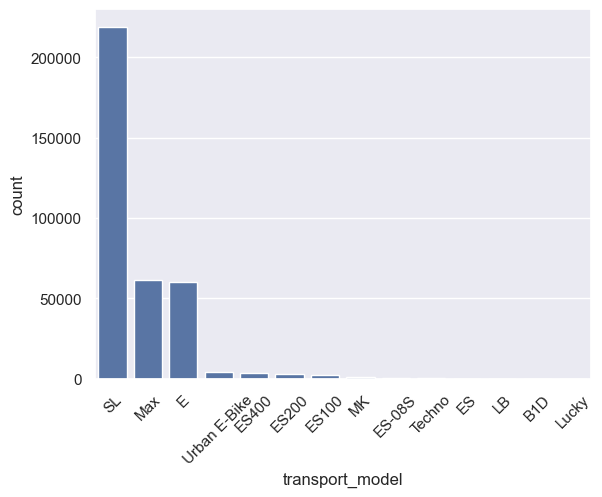

transport_model
SL              219011
Max              61752
E                59967
Urban E-Bike      3932
ES400             3668
ES200             2866
ES100             2398
MK                 929
ES-08S             730
Techno             196
ES                  92
LB                  70
B1D                 24
Lucky                2
Name: count, dtype: int64


In [25]:
sns.countplot(data=df, x='transport_model', order=df['transport_model'].value_counts().index)
plt.xticks(rotation=45)
plt.show()
print(df['transport_model'].value_counts())

Популярные модели самокатов:
- SL;
- Max;
- E.

Для распределения категориальных признаков, связанных с клиентами, важно учитывать уникальность идентификаторов, чтобы не искажать структуру пользователей.

In [26]:
# Проверим длину датасета с уникальными идентификаторами пользователей

print(len(user_df))

58033


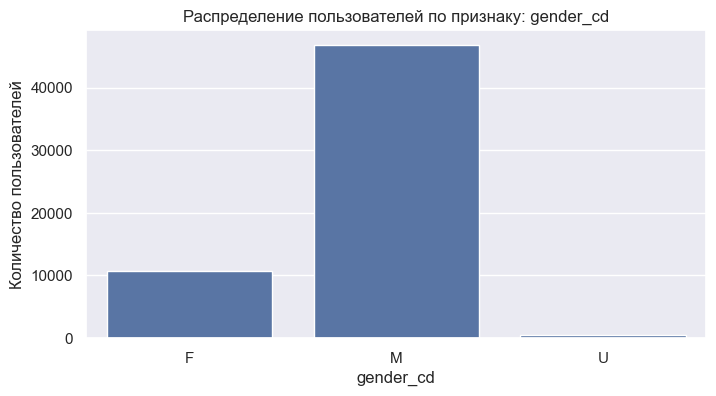

gender_cd
M    46835
F    10762
U      436
Name: count, dtype: int64


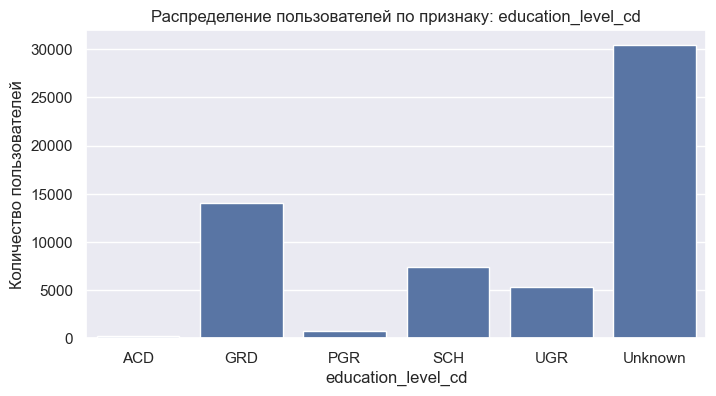

education_level_cd
Unknown    30482
GRD        13999
SCH         7418
UGR         5248
PGR          673
ACD          213
Name: count, dtype: int64


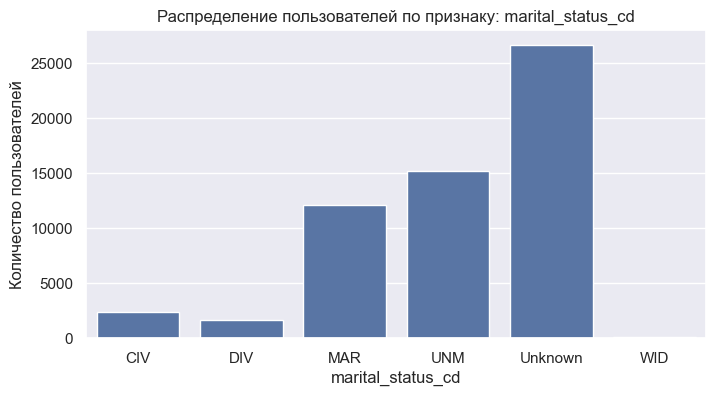

marital_status_cd
Unknown    26641
UNM        15173
MAR        12102
CIV         2342
DIV         1662
WID          113
Name: count, dtype: int64


In [27]:
category_columns = ['gender_cd', 'education_level_cd', 'marital_status_cd']

for col in category_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=user_df, x=col)
    # можно расположить данные в порядке убывания order=user_df[col].value_counts().index
    plt.title(f"Распределение пользователей по признаку: {col}")
    plt.xlabel(col)
    plt.ylabel("Количество пользователей")
    plt.show()
    print(user_df[col].value_counts())

**Анализ:**
- Мужчины составляют более 3/4 пользователей.
- У многих клиентов неизвестны следующие признаки: уровень образования и семейное положение.

In [28]:
# Посчитаем метрики для каждого пола в датасете поездок
df.groupby('gender_cd', observed=True).agg(rides=('order_rk','count'),
                        avg_price=('nominal_price_rub_amt','mean'),
                        avg_distance=('distance_km','mean')).sort_values('rides',ascending=False).head(10)

,rides,avg_price,avg_distance
gender_cd,,,
M,300822,127.912801,2.479471
F,52194,141.281109,2.500358
U,2621,120.832472,1.883984


По распределению видно, что:
- поездок мужчинами сделано значительно больше, чем женщинами (в том числе это обусловлено тем, что пользователей мужчин больше, чем женщин);
- при этом средняя стоимость поездки у женщин выше — 142.38₽ против 128.68₽ у мужчин;
- средняя дистанция у мужчин и женщин примерно одинакова.

Наблюдается различие в стоимости поездок между мужчинами и женщинами. Однако для подтверждения этого различия требуется статистическая проверка (что будет выполнено в `4_metrics_and_hypotheses.ipynb`), так как визуальные различия не гарантируют статистической значимости.

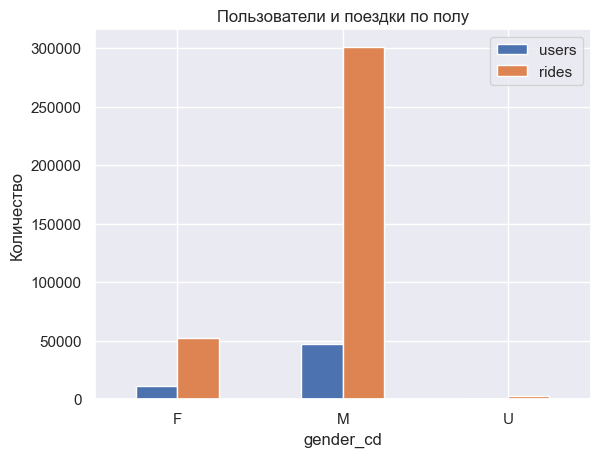

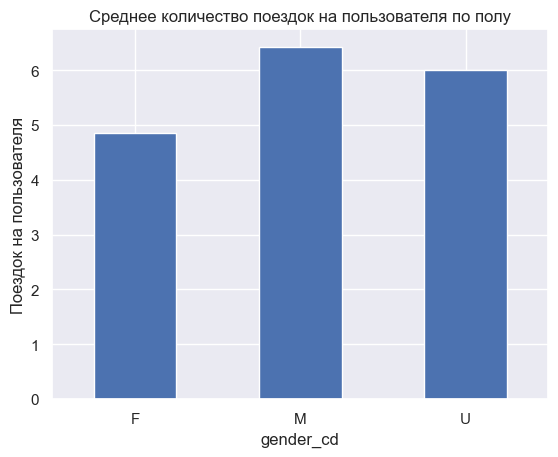

In [29]:
users_by_gender = pd.Series(df.groupby('gender_cd', observed=True)['party_rk'].nunique())
rides_by_gender = pd.Series(df.groupby('gender_cd', observed=True)['order_rk'].count())

# Создадим DataFrame для визуализации
gender_summary = pd.DataFrame({
    'users': users_by_gender,
    'rides': rides_by_gender
})

gender_summary.plot(kind='bar')
plt.title('Пользователи и поездки по полу')
plt.ylabel('Количество')
plt.xticks(rotation=0)
plt.show()

rides_per_user = rides_by_gender / users_by_gender
rides_per_user.plot(kind='bar')
plt.title('Среднее количество поездок на пользователя по полу')
plt.ylabel('Поездок на пользователя')
plt.xticks(rotation=0)
plt.show()

In [30]:
print(f"Один мужчина делает в среднем в {round(rides_per_user['M']/rides_per_user['F'], 2)} раза больше поездок, чем одна женщина.")

Один мужчина делает в среднем в 1.32 раза больше поездок, чем одна женщина.


Наблюдается различие в количестве поездок между мужчинами и женщинами. Однако для подтверждения этого различия требуется статистическая проверка (что будет выполнено в `4_metrics_and_hypotheses.ipynb`), так как визуальные различия не гарантируют статистической значимости.

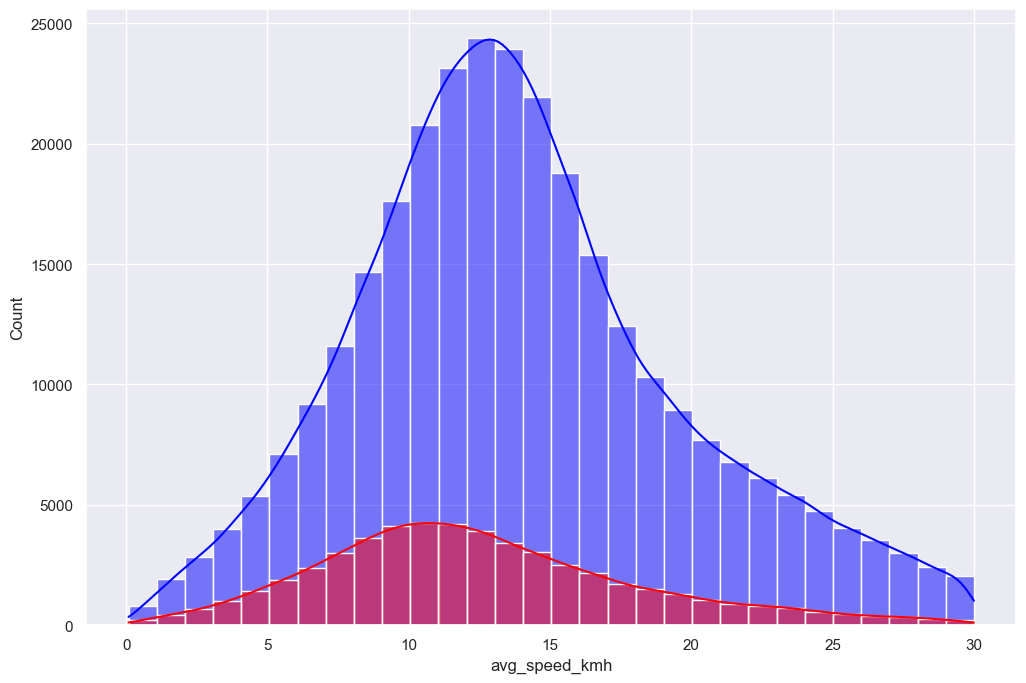

In [31]:
# Распределение средней скорости по полу
plt.figure(figsize=(12,8))
sns.histplot(df.query('gender_cd == "M"')['avg_speed_kmh'], bins=30, kde=True, color='blue')
sns.histplot(df.query('gender_cd == "F"')['avg_speed_kmh'], bins=30, kde=True, color='red')
plt.show()

Разная средняя скорость у мужчин и женщин — очень важный инсайт для объяснения гипотезы о средней стоимости поездки и её проверки.

**Анализ категориальных признаков:**
- Большинство пользователей — мужчины (примерно 3/4).
- Наибольшая активность приходится на крупные города, где есть инфраструктура для аренды самокатов и проживает большая часть клиентов.

**Вывод:** основная аудитория сервиса — молодые мужчины с активным образом жизни, проживающие в городах-миллионниках.

---
## 6. Формулировка гипотез
---

На основе EDA можно выдвинуть следующие гипотезы для дальнейшей проверки:

1. **Стоимость поездки различается между мужчинами и женщинами.**
Женщины совершают более дорогие поездки — возможно, из-за меньшей средней скорости. Проверим t-тестом в `4_metrics_and_hypotheses.ipynb`.

2. **Активность пользователей зависит от дня недели.**
Пик приходится на будние дни (особенно пятницу), выходные чуть спокойнее. Проверим через SQL-агрегации в `3_sql_queries.ipynb`.

3. **Средняя длительность поездки зависит от региона.**
В разных регионах могут отличаться условия поездок (трафик, расстояния, инфраструктура), поэтому средняя длительность может зависеть от региона. Проверим однофакторным ANOVA-тестом в `4_metrics_and_hypotheses.ipynb`.

4. **Возраст пользователей влияет на среднюю стоимость поездки.**
В EDA эта зависимость явно не анализировалась, но возможна зависимость между возрастом и поведением при использовании сервиса. Проверим корреляционным анализом в `4_metrics_and_hypotheses.ipynb`.

5. **Количество поездок различается между мужчинами и женщинами.**
Мужчины катаются чаще женщин, но их поездки дешевле. Проверим SQL-группировками в `3_sql_queries.ipynb`.

---
## 7. Выводы по исследовательскому анализу данных
---

- Активность пользователей растёт с понедельника к пятнице, пик приходится на вечерние часы (14:00–18:00).
- Сезонность ярко выражена: максимальные поездки летом (июль–сентябрь), спад в октябре.
- Большинство клиентов — мужчины 20-40 лет, проживающие в крупных городах.
- Основные метрики (скорость, дистанция, время, стоимость) распределены логично, сильная корреляция между расстоянием, временем и стоимостью.
- Выявленные зависимости позволяют сформулировать гипотезы о различиях в поведении пользователей и ценовых паттернах, которые будут проверены статистически и с помощью SQL-метрик на следующих этапах проекта.